In [1]:
import pandas as pd 
import numpy as np 
import cv2
import PIL
import matplotlib.pyplot as plt 
import plotly.express as px
import seaborn as sns
import glob
import random
import os
from os import listdir
random.seed(100)
np.random.seed(100)

# Getting all the dataset locations

https://www.kaggle.com/code/ahmedelmoataz/handling-the-dataset-for-cbis-ddsm-mass

https://www.kaggle.com/code/katepereira/breast-cancer-detection

https://www.kaggle.com/datasets/awsaf49/cbis-ddsm-breast-cancer-image-dataset?select=csv

https://www.kaggle.com/code/nitinsss/image-classification-with-cnn

https://arxiv.org/ftp/arxiv/papers/2203/2203.08812.pdf

file:///C:/Users/victo/Downloads/information-14-00410-v2.pdf

https://www.learndatasci.com/tutorials/convolutional-neural-networks-image-classification/

In [2]:
dicom_data = pd.read_csv('dicom_info.csv')
dicom_data.head()

,file_path,image_path,AccessionNumber,BitsAllocated,BitsStored,BodyPartExamined,Columns,ContentDate,ContentTime,ConversionType,...,SecondaryCaptureDeviceManufacturerModelName,SeriesDescription,SeriesInstanceUID,SeriesNumber,SmallestImagePixelValue,SpecificCharacterSet,StudyDate,StudyID,StudyInstanceUID,StudyTime
0,CBIS-DDSM/dicom/1.3.6.1.4.1.9590.100.1.2.12930...,CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.129308...,NaN,16,16,BREAST,351,20160426,131732.685,WSD,...,MATLAB,cropped images,1.3.6.1.4.1.9590.100.1.2.129308726812851964007...,1,23078,ISO_IR 100,20160720.0,DDSM,1.3.6.1.4.1.9590.100.1.2.271867287611061855725...,214951.0
1,CBIS-DDSM/dicom/1.3.6.1.4.1.9590.100.1.2.24838...,CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.248386...,NaN,16,16,BREAST,3526,20160426,143829.101,WSD,...,MATLAB,full mammogram images,1.3.6.1.4.1.9590.100.1.2.248386742010678582309...,1,0,ISO_IR 100,20160720.0,DDSM,1.3.6.1.4.1.9590.100.1.2.161516517311681906612...,193426.0
2,CBIS-DDSM/dicom/1.3.6.1.4.1.9590.100.1.2.26721...,CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.267213...,NaN,16,16,BREAST,1546,20160503,111956.298,WSD,...,MATLAB,full mammogram images,1.3.6.1.4.1.9590.100.1.2.267213171011171858918...,1,0,ISO_IR 100,20160807.0,DDSM,1.3.6.1.4.1.9590.100.1.2.291043622711253836701...,161814.0
3,CBIS-DDSM/dicom/1.3.6.1.4.1.9590.100.1.2.38118...,CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.381187...,NaN,16,16,BREAST,97,20160503,115347.770,WSD,...,MATLAB,cropped images,1.3.6.1.4.1.9590.100.1.2.381187369611524586537...,1,32298,ISO_IR 100,20170829.0,DDSM,1.3.6.1.4.1.9590.100.1.2.335006093711888937440...,180109.0
4,CBIS-DDSM/dicom/1.3.6.1.4.1.9590.100.1.2.38118...,CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.381187...,NaN,8,8,Left Breast,3104,20160503,115347.770,WSD,...,MATLAB,NaN,1.3.6.1.4.1.9590.100.1.2.381187369611524586537...,1,0,ISO_IR 100,NaN,DDSM,1.3.6.1.4.1.9590.100.1.2.335006093711888937440...,NaN


In [3]:
dicom_data.shape

(10237, 38)

In [4]:
image_dir = 'jpeg' #cartella che contiene le immagini

# 

In [5]:
# get paths of all mammogram images
full_mammogram_images=dicom_data[dicom_data.SeriesDescription == 'full mammogram images'].image_path
full_mammogram_images.head()

1     CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.248386...
2     CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.267213...
11    CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.210396...
12    CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.749566...
15    CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.987658...
Name: image_path, dtype: object

In [6]:
full_mammogram_images = full_mammogram_images.apply(lambda x: x.replace('CBIS-DDSM/jpeg', image_dir))
full_mammogram_images[1] #change the name

'jpeg/1.3.6.1.4.1.9590.100.1.2.248386742010678582309005372213277814849/1-249.jpg'

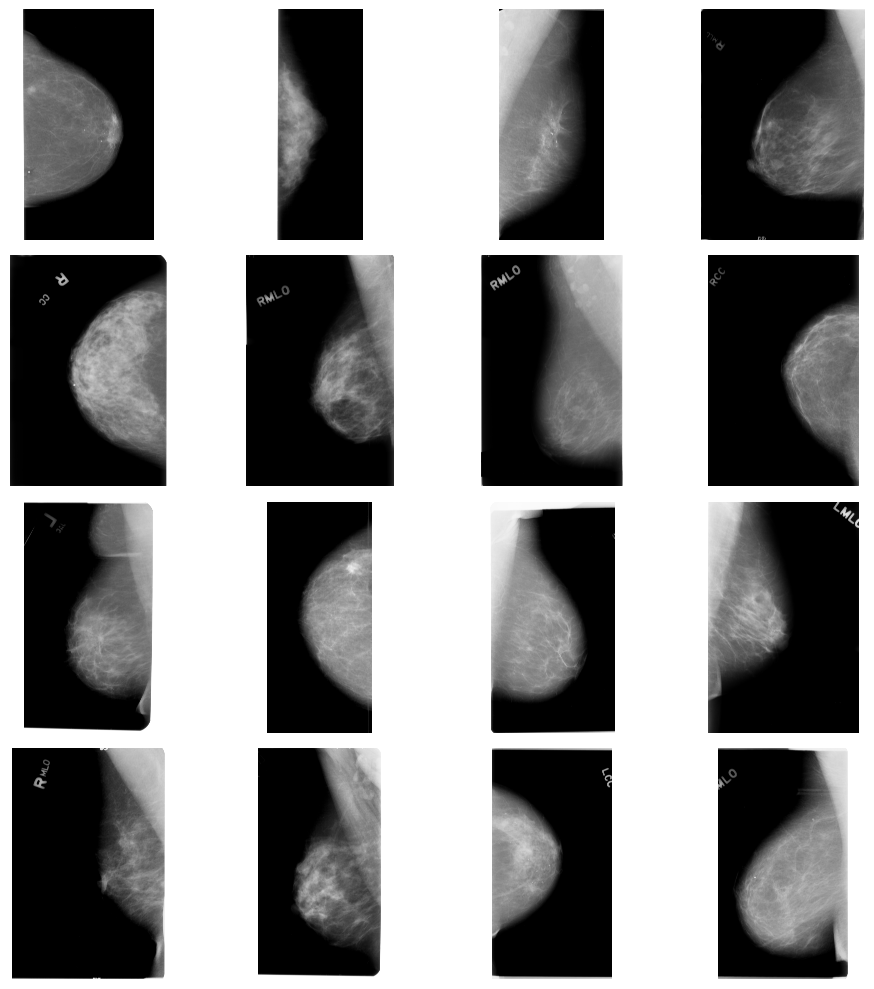

In [7]:
# 'full_mammogram_images' is a list of file paths to image files

# Create a figure and axis for the grid layout
fig, axes = plt.subplots(4, 4, figsize=(10, 10))

# Loop through the first 16 files (4x4 grid)
for i, file in enumerate(full_mammogram_images.iloc[0:16]):
    # Open the image using PIL
    cropped_images_show = PIL.Image.open(file)
    
    # Convert the image to grayscale
    gray_img = cropped_images_show.convert("L")
    
    # Calculate the row and column index for the current subplot
    row = i // 4
    col = i % 4
    
    # Display the grayscale image in the appropriate subplot
    axes[row, col].imshow(gray_img, cmap='gray')
    axes[row, col].axis('off')  # Turn off axis labels
    
# Adjust layout
plt.tight_layout()
plt.show()


In [8]:
# Create dictionaries to store image paths using keys extracted from the paths
full_mammogram_dict = dict()

# Populate the full_mammogram_dict dictionary
for dicom in full_mammogram_images:
    key = dicom.split("/")[1]  # Extract the key from the path
    full_mammogram_dict[key] = dicom

# Retrieve and print the first item (key-value pair) from the full_mammogram_dict dictionary
first_item = next(iter(full_mammogram_dict.items()))
print(first_item)

('1.3.6.1.4.1.9590.100.1.2.248386742010678582309005372213277814849', 'jpeg/1.3.6.1.4.1.9590.100.1.2.248386742010678582309005372213277814849/1-249.jpg')


# 

In [9]:
cropped_images=dicom_data[dicom_data.SeriesDescription == 'cropped images'].image_path
cropped_images.head()

0     CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.129308...
3     CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.381187...
6     CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.153339...
7     CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.178994...
10    CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.411833...
Name: image_path, dtype: object

In [10]:
# 'cropped_images' is a list of file paths to image files
cropped_images = cropped_images.apply(lambda x: x.replace('CBIS-DDSM/jpeg', image_dir))
cropped_images.head()
'''Cropping an image involves selecting a rectangular or non-rectangular region of interest (ROI) 
from the original image, discarding the rest of the content.'''

'Cropping an image involves selecting a rectangular or non-rectangular region of interest (ROI) \nfrom the original image, discarding the rest of the content.'

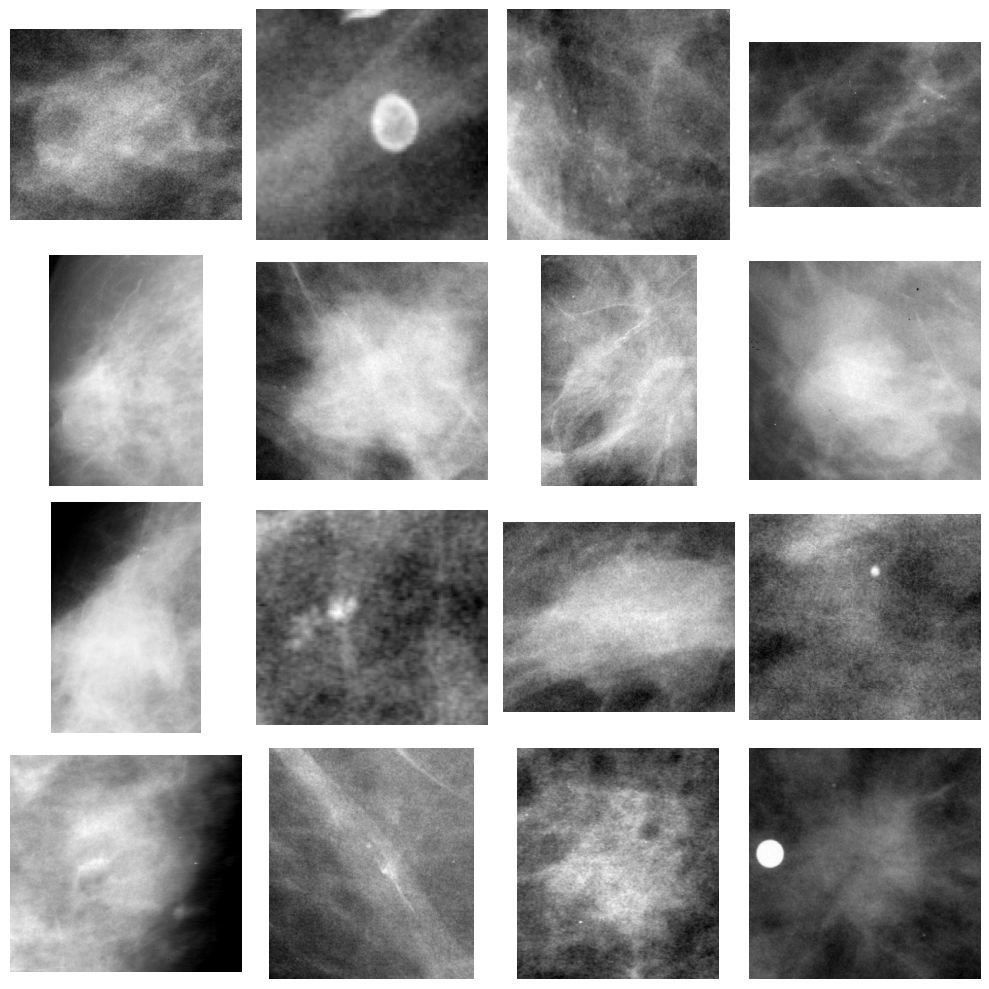

In [11]:
# 'cropped_images' is a list of file paths to image files
'''Region of Interest (ROI) Selection: In some cases, you might be interested 
in a specific region of an image that contains the most relevant information.
For example, in object detection or image classification tasks, you might crop 
the image to focus only on the object of interest.'''

# Create a figure and axis for the grid layout
fig, axes = plt.subplots(4, 4, figsize=(10, 10))

# Loop through the first 16 files (4x4 grid)
for i, file in enumerate(cropped_images.iloc[0:16]):
    # Open the image using PIL
    cropped_images_show = PIL.Image.open(file)
    
    # Convert the image to grayscale
    gray_img = cropped_images_show.convert("L")
    
    # Calculate the row and column index for the current subplot
    row = i // 4
    col = i % 4
    
    # Display the grayscale image in the appropriate subplot
    axes[row, col].imshow(gray_img, cmap='gray')
    axes[row, col].axis('off')  # Turn off axis labels
    
# Adjust layout
plt.tight_layout()
plt.show()


In [12]:
# Create dictionaries to store image paths using keys extracted from the paths
cropped_dict = dict()

# Populate the cropped_dict dictionary
for dicom in cropped_images:
    key = dicom.split("/")[1]  # Extract the key from the path
    cropped_dict[key] = dicom
    
# Retrieve and print the first item (key-value pair) from the full_mammogram_dict dictionary
first_item = next(iter(cropped_dict.items()))
print(first_item)

('1.3.6.1.4.1.9590.100.1.2.129308726812851964007517874181459556304', 'jpeg/1.3.6.1.4.1.9590.100.1.2.129308726812851964007517874181459556304/1-172.jpg')


# 

In [13]:
ROI_mask_images=dicom_data[dicom_data.SeriesDescription == 'ROI mask images'].image_path
ROI_mask_images.head()

5     CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.153339...
8     CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.178994...
9     CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.411833...
14    CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.236373...
20    CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.357008...
Name: image_path, dtype: object

In [14]:
ROI_mask_images = ROI_mask_images.apply(lambda x: x.replace('CBIS-DDSM/jpeg', image_dir))
ROI_mask_images.head()

5     jpeg/1.3.6.1.4.1.9590.100.1.2.1533390529131213...
8     jpeg/1.3.6.1.4.1.9590.100.1.2.1789947146114851...
9     jpeg/1.3.6.1.4.1.9590.100.1.2.4118334926123736...
14    jpeg/1.3.6.1.4.1.9590.100.1.2.2363735487129941...
20    jpeg/1.3.6.1.4.1.9590.100.1.2.3570080504125347...
Name: image_path, dtype: object

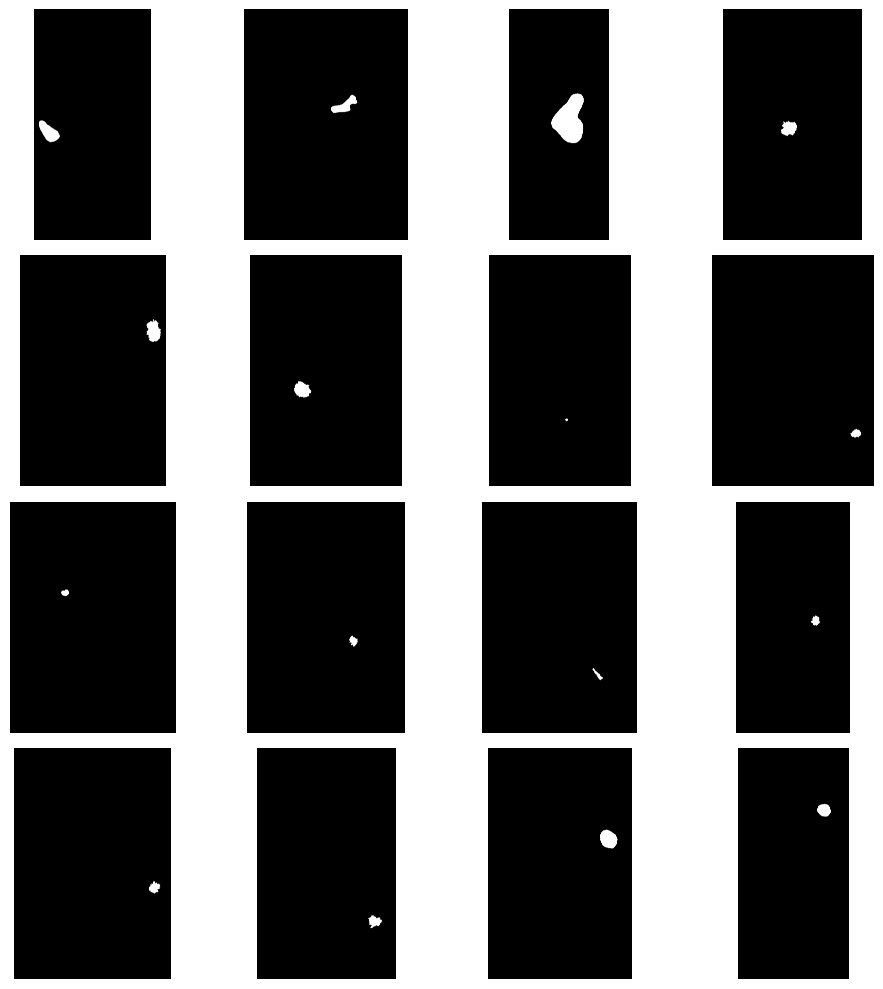

In [15]:
# 'ROI_mask_images' is a list of file paths to image files

# Create a figure and axis for the grid layout
fig, axes = plt.subplots(4, 4, figsize=(10, 10))

# Loop through the first 16 files (4x4 grid)
for i, file in enumerate(ROI_mask_images.iloc[0:16]):
    # Open the image using PIL
    cropped_images_show = PIL.Image.open(file)
    
    # Convert the image to grayscale
    gray_img = cropped_images_show.convert("L")
    
    # Calculate the row and column index for the current subplot
    row = i // 4
    col = i % 4
    
    # Display the grayscale image in the appropriate subplot
    axes[row, col].imshow(gray_img, cmap='gray')
    axes[row, col].axis('off')  # Turn off axis labels
    
# Adjust layout
plt.tight_layout()
plt.show()


In [16]:
# Create dictionaries to store image paths using keys extracted from the paths
roi_mask_dict = dict()

# Populate the roi_mask_dict dictionary
for dicom in ROI_mask_images:
    key = dicom.split("/")[1]  # Extract the key from the path
    roi_mask_dict[key] = dicom

# Retrieve and print the first item (key-value pair) from the full_mammogram_dict dictionary
first_item = next(iter(roi_mask_dict.items()))
print(first_item)

('1.3.6.1.4.1.9590.100.1.2.153339052913121382622526066491844156138', 'jpeg/1.3.6.1.4.1.9590.100.1.2.153339052913121382622526066491844156138/2-270.jpg')


In [19]:
'''Haze Removal can remove slight to extreme cases of haze affecting an image. 
Its most typical use is for landscape photography where the haze causes low 
contrast and low saturation, but it can also be used to improve images taken 
during rainy and foggy conditions.'''

'''Define a function named haze_reduced_local_global that takes three parameters:

hazy_image: The input hazy image (in BGR color space).
window_size: The size of the window for various operations.
epsilon: A small constant for refining the transmission map.'''

def haze_reduced_local_global(hazy_image, window_size=15, epsilon=0.001):
    # Convert the hazy image to LAB color space
    hazy_lab = cv2.cvtColor(hazy_image, cv2.COLOR_BGR2LAB)
    
    # Split the LAB image into its L, A, and B channels
    hazy_l, hazy_a, hazy_b = cv2.split(hazy_lab)

    # Estimate the atmospheric light as the maximum intensity in the L channel
    atmospheric_light = np.max(hazy_l)

    # Calculate the dark channel of the hazy image
    hazy_dark = cv2.erode(hazy_l, cv2.getStructuringElement(cv2.MORPH_RECT, (window_size, window_size)))

    # Estimate the transmission map as 1 minus the normalized dark channel
    transmission_map = 1 - hazy_dark / atmospheric_light

    # Calculate the refined transmission map
    refined_transmission_map = cv2.max(transmission_map, epsilon)

    # Calculate the inverse transmission map
    inverse_transmission_map = 1 / refined_transmission_map

    # Dehaze the image using the estimated atmospheric light and inverse transmission map
    dehazed_l = (hazy_l.astype(np.float32) - atmospheric_light) * inverse_transmission_map + atmospheric_light

    # Clip the dehazed L channel to the valid range [0, 255]
    dehazed_l = np.clip(dehazed_l, 0, 255).astype(np.uint8)

    # Merge the dehazed L channel with the original A and B channels
    dehazed_lab = cv2.merge((dehazed_l, hazy_a, hazy_b))

    # Convert the LAB image back to BGR color space
    dehazed_bgr = cv2.cvtColor(dehazed_lab, cv2.COLOR_LAB2BGR)

    return dehazed_bgr
'''
The result of the process is a dehazed image with reduced haze and 
enhanced visibility.'''

'\nThe result of the process is a dehazed image with reduced haze and \nenhanced visibility.'

# 

# Getting all the Mass dataset

In [20]:
mass_train_data = pd.read_csv('mass_case_description_train_set.csv')
mass_test_data = pd.read_csv('mass_case_description_test_set.csv')

In [21]:
mass_train_data.head()

,patient_id,breast_density,left or right breast,image view,abnormality id,abnormality type,mass shape,mass margins,assessment,pathology,subtlety,image file path,cropped image file path,ROI mask file path
0,P_00001,3,LEFT,CC,1,mass,IRREGULAR-ARCHITECTURAL_DISTORTION,SPICULATED,4,MALIGNANT,4,Mass-Training_P_00001_LEFT_CC/1.3.6.1.4.1.9590...,Mass-Training_P_00001_LEFT_CC_1/1.3.6.1.4.1.95...,Mass-Training_P_00001_LEFT_CC_1/1.3.6.1.4.1.95...
1,P_00001,3,LEFT,MLO,1,mass,IRREGULAR-ARCHITECTURAL_DISTORTION,SPICULATED,4,MALIGNANT,4,Mass-Training_P_00001_LEFT_MLO/1.3.6.1.4.1.959...,Mass-Training_P_00001_LEFT_MLO_1/1.3.6.1.4.1.9...,Mass-Training_P_00001_LEFT_MLO_1/1.3.6.1.4.1.9...
2,P_00004,3,LEFT,CC,1,mass,ARCHITECTURAL_DISTORTION,ILL_DEFINED,4,BENIGN,3,Mass-Training_P_00004_LEFT_CC/1.3.6.1.4.1.9590...,Mass-Training_P_00004_LEFT_CC_1/1.3.6.1.4.1.95...,Mass-Training_P_00004_LEFT_CC_1/1.3.6.1.4.1.95...
3,P_00004,3,LEFT,MLO,1,mass,ARCHITECTURAL_DISTORTION,ILL_DEFINED,4,BENIGN,3,Mass-Training_P_00004_LEFT_MLO/1.3.6.1.4.1.959...,Mass-Training_P_00004_LEFT_MLO_1/1.3.6.1.4.1.9...,Mass-Training_P_00004_LEFT_MLO_1/1.3.6.1.4.1.9...
4,P_00004,3,RIGHT,MLO,1,mass,OVAL,CIRCUMSCRIBED,4,BENIGN,5,Mass-Training_P_00004_RIGHT_MLO/1.3.6.1.4.1.95...,Mass-Training_P_00004_RIGHT_MLO_1/1.3.6.1.4.1....,Mass-Training_P_00004_RIGHT_MLO_1/1.3.6.1.4.1....


In [22]:
mass_test_data.head()

,patient_id,breast_density,left or right breast,image view,abnormality id,abnormality type,mass shape,mass margins,assessment,pathology,subtlety,image file path,cropped image file path,ROI mask file path
0,P_00016,4,LEFT,CC,1,mass,IRREGULAR,SPICULATED,5,MALIGNANT,5,Mass-Test_P_00016_LEFT_CC/1.3.6.1.4.1.9590.100...,Mass-Test_P_00016_LEFT_CC_1/1.3.6.1.4.1.9590.1...,Mass-Test_P_00016_LEFT_CC_1/1.3.6.1.4.1.9590.1...
1,P_00016,4,LEFT,MLO,1,mass,IRREGULAR,SPICULATED,5,MALIGNANT,5,Mass-Test_P_00016_LEFT_MLO/1.3.6.1.4.1.9590.10...,Mass-Test_P_00016_LEFT_MLO_1/1.3.6.1.4.1.9590....,Mass-Test_P_00016_LEFT_MLO_1/1.3.6.1.4.1.9590....
2,P_00017,2,LEFT,CC,1,mass,ROUND,CIRCUMSCRIBED,4,MALIGNANT,4,Mass-Test_P_00017_LEFT_CC/1.3.6.1.4.1.9590.100...,Mass-Test_P_00017_LEFT_CC_1/1.3.6.1.4.1.9590.1...,Mass-Test_P_00017_LEFT_CC_1/1.3.6.1.4.1.9590.1...
3,P_00017,2,LEFT,MLO,1,mass,ROUND,ILL_DEFINED,4,MALIGNANT,4,Mass-Test_P_00017_LEFT_MLO/1.3.6.1.4.1.9590.10...,Mass-Test_P_00017_LEFT_MLO_1/1.3.6.1.4.1.9590....,Mass-Test_P_00017_LEFT_MLO_1/1.3.6.1.4.1.9590....
4,P_00032,3,RIGHT,CC,1,mass,ROUND,OBSCURED,0,BENIGN,2,Mass-Test_P_00032_RIGHT_CC/1.3.6.1.4.1.9590.10...,Mass-Test_P_00032_RIGHT_CC_1/1.3.6.1.4.1.9590....,Mass-Test_P_00032_RIGHT_CC_1/1.3.6.1.4.1.9590....


# 

# Edit the impage path in mass dataset from dicom list

In [23]:
def fix_image_path(dataset):
    for i, img in enumerate(dataset.values):
        # Extract image names from the paths in the dataset
        img_name = img[11].split("/")[2]  # Extract image name from column 11
        # Update the corresponding path in the dataset using full_mammogram_dict
        dataset.iloc[i, 11] = full_mammogram_dict[img_name]

        img_name = img[12].split("/")[2]  # Extract image name from column 12
        # Update the corresponding path in the dataset using cropped_dict
        dataset.iloc[i, 12] = cropped_dict[img_name]

        img_name = img[13].split("/")[2]  # Extract image name from column 13
        # Update the corresponding path in the dataset using ROI_mask_dict
        dataset.iloc[i, 13] = roi_mask_dict[img_name]

In [24]:
fix_image_path(mass_train_data)
mass_train_data.head()

,patient_id,breast_density,left or right breast,image view,abnormality id,abnormality type,mass shape,mass margins,assessment,pathology,subtlety,image file path,cropped image file path,ROI mask file path
0,P_00001,3,LEFT,CC,1,mass,IRREGULAR-ARCHITECTURAL_DISTORTION,SPICULATED,4,MALIGNANT,4,jpeg/1.3.6.1.4.1.9590.100.1.2.3423861948112676...,jpeg/1.3.6.1.4.1.9590.100.1.2.2967364033137925...,jpeg/1.3.6.1.4.1.9590.100.1.2.2967364033137925...
1,P_00001,3,LEFT,MLO,1,mass,IRREGULAR-ARCHITECTURAL_DISTORTION,SPICULATED,4,MALIGNANT,4,jpeg/1.3.6.1.4.1.9590.100.1.2.3593083293123978...,jpeg/1.3.6.1.4.1.9590.100.1.2.2279552747112257...,jpeg/1.3.6.1.4.1.9590.100.1.2.2279552747112257...
2,P_00004,3,LEFT,CC,1,mass,ARCHITECTURAL_DISTORTION,ILL_DEFINED,4,BENIGN,3,jpeg/1.3.6.1.4.1.9590.100.1.2.8918004621102253...,jpeg/1.3.6.1.4.1.9590.100.1.2.4291204140118329...,jpeg/1.3.6.1.4.1.9590.100.1.2.4291204140118329...
3,P_00004,3,LEFT,MLO,1,mass,ARCHITECTURAL_DISTORTION,ILL_DEFINED,4,BENIGN,3,jpeg/1.3.6.1.4.1.9590.100.1.2.2953609263134927...,jpeg/1.3.6.1.4.1.9590.100.1.2.1151342321130015...,jpeg/1.3.6.1.4.1.9590.100.1.2.1151342321130015...
4,P_00004,3,RIGHT,MLO,1,mass,OVAL,CIRCUMSCRIBED,4,BENIGN,5,jpeg/1.3.6.1.4.1.9590.100.1.2.4105247549130579...,jpeg/1.3.6.1.4.1.9590.100.1.2.1285736631262570...,jpeg/1.3.6.1.4.1.9590.100.1.2.1285736631262570...


In [25]:
fix_image_path(mass_test_data)
mass_train_data.head()

,patient_id,breast_density,left or right breast,image view,abnormality id,abnormality type,mass shape,mass margins,assessment,pathology,subtlety,image file path,cropped image file path,ROI mask file path
0,P_00001,3,LEFT,CC,1,mass,IRREGULAR-ARCHITECTURAL_DISTORTION,SPICULATED,4,MALIGNANT,4,jpeg/1.3.6.1.4.1.9590.100.1.2.3423861948112676...,jpeg/1.3.6.1.4.1.9590.100.1.2.2967364033137925...,jpeg/1.3.6.1.4.1.9590.100.1.2.2967364033137925...
1,P_00001,3,LEFT,MLO,1,mass,IRREGULAR-ARCHITECTURAL_DISTORTION,SPICULATED,4,MALIGNANT,4,jpeg/1.3.6.1.4.1.9590.100.1.2.3593083293123978...,jpeg/1.3.6.1.4.1.9590.100.1.2.2279552747112257...,jpeg/1.3.6.1.4.1.9590.100.1.2.2279552747112257...
2,P_00004,3,LEFT,CC,1,mass,ARCHITECTURAL_DISTORTION,ILL_DEFINED,4,BENIGN,3,jpeg/1.3.6.1.4.1.9590.100.1.2.8918004621102253...,jpeg/1.3.6.1.4.1.9590.100.1.2.4291204140118329...,jpeg/1.3.6.1.4.1.9590.100.1.2.4291204140118329...
3,P_00004,3,LEFT,MLO,1,mass,ARCHITECTURAL_DISTORTION,ILL_DEFINED,4,BENIGN,3,jpeg/1.3.6.1.4.1.9590.100.1.2.2953609263134927...,jpeg/1.3.6.1.4.1.9590.100.1.2.1151342321130015...,jpeg/1.3.6.1.4.1.9590.100.1.2.1151342321130015...
4,P_00004,3,RIGHT,MLO,1,mass,OVAL,CIRCUMSCRIBED,4,BENIGN,5,jpeg/1.3.6.1.4.1.9590.100.1.2.4105247549130579...,jpeg/1.3.6.1.4.1.9590.100.1.2.1285736631262570...,jpeg/1.3.6.1.4.1.9590.100.1.2.1285736631262570...


In [26]:
# Concatenate the two dataframes
mass_data = pd.DataFrame(pd.concat([mass_train_data, mass_test_data]))

# Display the first few rows of the concatenated dataframe
mass_data

mass_data['ROI mask file path'].to_csv('masks', index=False)

# 

In [27]:
IMG_WIDTH, IMG_HEIGHT = (256, 256)
IMG_CHANNELS = 3

In [28]:
def load_image(img):
    # img  è il path dove si trova l'immagine e la leggiamo con imread
    c_img = cv2.imread(img, cv2.IMREAD_COLOR)
    #resize cause a lot of images have different size
    c_img_size = cv2.resize(c_img, (IMG_WIDTH, IMG_HEIGHT), interpolation = cv2.INTER_LINEAR)  
        
    return c_img_size


In [29]:
def ROTATE_90_CLOCKWISE(image):
    return np.rot90(image, k=1, axes=(0, 1))

In [30]:
def ROTATE_90_COUNTERCLOCKWISE(image):
    return np.rot90(image, k=3, axes=(0, 1))

In [31]:
def ROTATE_180(image):
    return np.rot90(image, k=2, axes=(0, 1))

<h1> UNet

In [32]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
import numpy as np

https://www.tensorflow.org/tutorials/images/segmentation?hl=it

https://keras.io/examples/vision/oxford_pets_image_segmentation/

https://medium.com/geekculture/u-net-implementation-from-scratch-using-tensorflow-b4342266e406

https://towardsdatascience.com/medical-image-segmentation-part-1-unet-convolutional-networks-with-interactive-code-70f0f17f46c6

https://github.com/VidushiBhatia/U-Net-Implementation/blob/main/U_Net_for_Image_Segmentation_From_Scratch_Using_TensorFlow_v4.ipynb

https://www.tensorflow.org/tutorials/images/segmentation?hl=it

https://keras.io/examples/vision/oxford_pets_image_segmentation/

# 

<h2> Prepaid the train/test dataset for mass cancer

In [33]:
def normalize_input_image(input_image):
    input_image = tf.cast(input_image, tf.float32) / 255.0
    return input_image

In [34]:
def normalize_mask_image( input_mask):
    input_mask -= 1
    return input_mask

In [35]:
def convert_to_grayscale(img):
    # img  è il path dove si trova l'immagine e la leggiamo con imread
    c_img = cv2.imread(img, cv2.IMREAD_COLOR)
    
    #resize cause a lot of images have different size
    c_img_size = cv2.resize(c_img, (IMG_WIDTH, IMG_HEIGHT), interpolation = cv2.INTER_LINEAR)
    
    # Convert to grayscale
    grayscale_image = cv2.cvtColor(c_img_size, cv2.COLOR_RGB2GRAY)
    
    # Resize to (224, 224)
    resized_image = cv2.resize(grayscale_image, (IMG_WIDTH, IMG_HEIGHT))
    
    # Expand dimensions 
    
    reshaped_image = np.expand_dims(resized_image, axis=-1)
    
    # Apply the conversion
    binary_array = (reshaped_image > 0).astype(np.uint8)  # Convert True to 1, False to 0

    
    return binary_array


In [36]:
def get_images_result_UNet(dataset):
    with ThreadPoolExecutor() as executor:
        images  = np.array(list(executor.map(load_image, dataset.loc[:]['image file path'])))
        masks  = np.array(list(executor.map(convert_to_grayscale, dataset.loc[:]['ROI mask file path'])))    
    
     # Return a tuple containing images and binary class matrices
    return (images, masks )

In [37]:
import cv2
import time
import tensorflow as tf 

from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, BatchNormalization
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense
from tensorflow.keras.losses import categorical_crossentropy
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.models import load_model
from sklearn.model_selection import train_test_split
tf.random.set_seed(100)

In [38]:
from concurrent.futures import ThreadPoolExecutor
# multiple threads reading data
mass_train_data_shuffled = mass_train_data.sample(frac = 1)
mass_test_data_shuffled = mass_test_data.sample(frac = 1)


(X_train, y_train) = get_images_result_UNet(mass_train_data_shuffled)
(X_test, y_test) = get_images_result_UNet(mass_test_data_shuffled)


print('X_train shape : {}' .format(X_train.shape))
print('y_train shape : {}' .format(y_train.shape))
print('X_test shape : {}' .format(X_test.shape))
print('y_test shape : {}' .format(y_test.shape))

X_train shape : (1318, 256, 256, 3)
y_train shape : (1318, 256, 256, 1)
X_test shape : (378, 256, 256, 3)
y_test shape : (378, 256, 256, 1)


In [39]:
mask = y_train[0]
print('Shape: ', mask.shape)
print('Max pixel value: ', mask.max())
print('Min pixel value: ', mask.min())

Shape:  (256, 256, 1)
Max pixel value:  1
Min pixel value:  0


In [40]:
def ROTATE_90_CLOCKWISE(image):
    return np.rot90(image, k=1, axes=(0, 1))

In [41]:
def ROTATE_90_COUNTERCLOCKWISE(image):
    return np.rot90(image, k=3, axes=(0, 1))

In [42]:
def ROTATE_180(image):
    return np.rot90(image, k=2, axes=(0, 1))

In [43]:
def augmented_data_ROTATE_90_CLOCKWISE_UNet(X_train, y_train):
    with ThreadPoolExecutor() as executor:
        images = np.array(list(executor.map(ROTATE_90_CLOCKWISE, X_train)))
        masks = np.array(list(executor.map(ROTATE_90_CLOCKWISE, y_train)))
            
    return (images, masks)

X_rotate_90, y_rotate_90 = augmented_data_ROTATE_90_CLOCKWISE_UNet(X_train, y_train)

In [44]:
def augmented_data_ROTATE_90_COUNTERCLOCKWISE(X_train, y_train):
    with ThreadPoolExecutor() as executor:
        images = np.array(list(executor.map(ROTATE_90_COUNTERCLOCKWISE, X_train)))
        masks = np.array(list(executor.map(ROTATE_90_COUNTERCLOCKWISE, y_train)))
            
     # Return a tuple containing images and binary class matrices
    return (images, masks)

X_rotate_90_c, y_rotate_90_c = augmented_data_ROTATE_90_COUNTERCLOCKWISE(X_train, y_train)

In [45]:
def augmented_data_ROTATE_180(X_train, y_train):
    with ThreadPoolExecutor() as executor:
        images = np.array(list(executor.map(ROTATE_180, X_train)))
        masks = np.array(list(executor.map(ROTATE_180, y_train)))
            
     # Return a tuple containing images and binary class matrices
    return (images, masks)

X_rotate_180, y_rotate_180 = augmented_data_ROTATE_180(X_train, y_train)

In [46]:

X = np.concatenate((X_train, X_rotate_90), axis=0)
X = np.concatenate((X, X_rotate_90_c), axis=0)
X = np.concatenate((X, X_rotate_180), axis=0)
X = X_train

y = np.concatenate((y_train, y_rotate_90), axis=0)
y = np.concatenate((y, y_rotate_90_c), axis=0)
y = np.concatenate((y, y_rotate_180), axis=0)
y = y_train

# 

# 

# 

# 

<h2>  Constructing the U-Net Architecture

In [47]:
from keras.models import Model, load_model
from keras.layers import Input
from keras.layers import Dropout, Lambda
from keras.layers import Conv2D, Conv2DTranspose
from keras.layers import MaxPooling2D
from keras.layers import concatenate
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras import backend as K

import tensorflow as tf

In [48]:
import pandas as pd
import numpy as np
import os

import matplotlib.pyplot as plt
%matplotlib inline

from skimage.io import imread, imshow
from skimage.transform import resize

In [47]:
inputs = Input((IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS))

s = Lambda(lambda x: x / 255) (inputs)

c1 = Conv2D(16, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (s)
c1 = Dropout(0.1) (c1)
c1 = Conv2D(16, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (c1)
p1 = MaxPooling2D((2, 2)) (c1)

c2 = Conv2D(32, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (p1)
c2 = Dropout(0.1) (c2)
c2 = Conv2D(32, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (c2)
p2 = MaxPooling2D((2, 2)) (c2)

c3 = Conv2D(64, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (p2)
c3 = Dropout(0.2) (c3)
c3 = Conv2D(64, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (c3)
p3 = MaxPooling2D((2, 2)) (c3)

c4 = Conv2D(128, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (p3)
c4 = Dropout(0.2) (c4)
c4 = Conv2D(128, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (c4)
p4 = MaxPooling2D(pool_size=(2, 2)) (c4)

c5 = Conv2D(256, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (p4)
c5 = Dropout(0.3) (c5)
c5 = Conv2D(256, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (c5)

u6 = Conv2DTranspose(128, (2, 2), strides=(2, 2), padding='same') (c5)
u6 = concatenate([u6, c4])
c6 = Conv2D(128, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (u6)
c6 = Dropout(0.2) (c6)
c6 = Conv2D(128, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (c6)

u7 = Conv2DTranspose(64, (2, 2), strides=(2, 2), padding='same') (c6)
u7 = concatenate([u7, c3])
c7 = Conv2D(64, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (u7)
c7 = Dropout(0.2) (c7)
c7 = Conv2D(64, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (c7)

u8 = Conv2DTranspose(32, (2, 2), strides=(2, 2), padding='same') (c7)
u8 = concatenate([u8, c2])
c8 = Conv2D(32, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (u8)
c8 = Dropout(0.1) (c8)
c8 = Conv2D(32, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (c8)

u9 = Conv2DTranspose(16, (2, 2), strides=(2, 2), padding='same') (c8)
u9 = concatenate([u9, c1], axis=3)
c9 = Conv2D(16, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (u9)
c9 = Dropout(0.1) (c9)
c9 = Conv2D(16, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (c9)

outputs = Conv2D(1, (1, 1), activation='sigmoid') (c9)

model = Model(inputs=[inputs], outputs=[outputs])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 256, 256, 3)]        0         []                            
                                                                                                  
 lambda (Lambda)             (None, 256, 256, 3)          0         ['input_1[0][0]']             
                                                                                                  
 conv2d (Conv2D)             (None, 256, 256, 16)         448       ['lambda[0][0]']              
                                                                                                  
 dropout (Dropout)           (None, 256, 256, 16)         0         ['conv2d[0][0]']              
                                                                                              

 conv2d_15 (Conv2D)          (None, 128, 128, 32)         9248      ['dropout_7[0][0]']           
                                                                                                  
 conv2d_transpose_3 (Conv2D  (None, 256, 256, 16)         2064      ['conv2d_15[0][0]']           
 Transpose)                                                                                       
                                                                                                  
 concatenate_3 (Concatenate  (None, 256, 256, 32)         0         ['conv2d_transpose_3[0][0]',  
 )                                                                   'conv2d_1[0][0]']            
                                                                                                  
 conv2d_16 (Conv2D)          (None, 256, 256, 16)         4624      ['concatenate_3[0][0]']       
                                                                                                  
 dropout_8

In [ ]:
filepath = "model.h5"

earlystopper = EarlyStopping(patience=5, verbose=1)

checkpoint = ModelCheckpoint(filepath, monitor='val_loss', verbose=1, 
                             save_best_only=True, mode='min')

callbacks_list = [checkpoint]

history = model.fit(X_train, y_train, validation_split=0.1, batch_size=16, epochs=65, 
                    callbacks=callbacks_list)

Epoch 1/65
75/75 [==============================] - ETA: 0s - loss: 0.0533 - accuracy: 0.9883
Epoch 1: val_loss improved from inf to 0.03202, saving model to model.h5
75/75 [==============================] - 362s 5s/step - loss: 0.0533 - accuracy: 0.9883 - val_loss: 0.0320 - val_accuracy: 0.9939
Epoch 2/65


C:\Users\victo\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


75/75 [==============================] - ETA: 0s - loss: 0.0274 - accuracy: 0.9947
Epoch 2: val_loss did not improve from 0.03202
75/75 [==============================] - 351s 5s/step - loss: 0.0274 - accuracy: 0.9947 - val_loss: 0.0356 - val_accuracy: 0.9939
Epoch 3/65
75/75 [==============================] - ETA: 0s - loss: 0.0258 - accuracy: 0.9947
Epoch 3: val_loss improved from 0.03202 to 0.02856, saving model to model.h5
75/75 [==============================] - 336s 4s/step - loss: 0.0258 - accuracy: 0.9947 - val_loss: 0.0286 - val_accuracy: 0.9939
Epoch 4/65
75/75 [==============================] - ETA: 0s - loss: 0.0240 - accuracy: 0.9946
Epoch 4: val_loss did not improve from 0.02856
75/75 [==============================] - 335s 4s/step - loss: 0.0240 - accuracy: 0.9946 - val_loss: 0.0289 - val_accuracy: 0.9939
Epoch 5/65
75/75 [==============================] - ETA: 0s - loss: 0.0226 - accuracy: 0.9947
Epoch 5: val_loss improved from 0.02856 to 0.02547, saving model to model.

In [ ]:
model.save('saved_models/brestcancer_unet_50epochs.hdf')

In [ ]:
model = load_model('saved_models/brestcancer_unet_50epochs.hdf')

In [73]:
from keras.models import load_model
pretrained_unet = load_model('saved_models/brestcancer_unet_50epochs.hdf')
pretrained_unet.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

filepath = "model.h5"
checkpoint = ModelCheckpoint(filepath, monitor='val_loss', verbose=1, 
                             save_best_only=True, mode='min')

callbacks_list = [checkpoint]
history = pretrained_unet.fit(X_train, y_train, validation_split=0.1, batch_size=16, epochs=12, 
                    callbacks=callbacks_list)


Epoch 1/12
75/75 [==============================] - ETA: 0s - loss: 0.0106 - accuracy: 0.9963
Epoch 1: val_loss improved from inf to 0.02501, saving model to model.h5
75/75 [==============================] - 334s 4s/step - loss: 0.0106 - accuracy: 0.9963 - val_loss: 0.0250 - val_accuracy: 0.9941
Epoch 2/12


C:\Users\victo\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


75/75 [==============================] - ETA: 0s - loss: 0.0093 - accuracy: 0.9967
Epoch 2: val_loss improved from 0.02501 to 0.02473, saving model to model.h5
75/75 [==============================] - 341s 5s/step - loss: 0.0093 - accuracy: 0.9967 - val_loss: 0.0247 - val_accuracy: 0.9941
Epoch 3/12
75/75 [==============================] - ETA: 0s - loss: 0.0095 - accuracy: 0.9967
Epoch 3: val_loss improved from 0.02473 to 0.02450, saving model to model.h5
75/75 [==============================] - 334s 4s/step - loss: 0.0095 - accuracy: 0.9967 - val_loss: 0.0245 - val_accuracy: 0.9935
Epoch 4/12
75/75 [==============================] - ETA: 0s - loss: 0.0092 - accuracy: 0.9967
Epoch 4: val_loss did not improve from 0.02450
75/75 [==============================] - 336s 4s/step - loss: 0.0092 - accuracy: 0.9967 - val_loss: 0.0278 - val_accuracy: 0.9940
Epoch 5/12
75/75 [==============================] - ETA: 0s - loss: 0.0083 - accuracy: 0.9969
Epoch 5: val_loss did not improve from 0.024

In [74]:
pretrained_unet.save('saved_models/brestcancer_unet_60epochs_v2.hdf')

INFO:tensorflow:Assets written to: saved_models/brestcancer_unet_60epochs_v2.hdf\assets


INFO:tensorflow:Assets written to: saved_models/brestcancer_unet_60epochs_v2.hdf\assets


In [51]:
pretrained_unet.save('saved_models/brestcancer_unet_70epochs_v2.hdf')

INFO:tensorflow:Assets written to: saved_models/brestcancer_unet_70epochs_v2.hdf\assets


INFO:tensorflow:Assets written to: saved_models/brestcancer_unet_70epochs_v2.hdf\assets


In [75]:
#pretrained_unet = load_model('saved_models/brestcancer_unet_70epochs_v2.hdf')
model = pretrained_unet

In [49]:
from keras.models import load_model
pretrained_unet2 = load_model('saved_models/brestcancer_unet_70epochs_v2.hdf')
pretrained_unet2.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

filepath = "model.h5"
checkpoint = ModelCheckpoint(filepath, monitor='val_loss', verbose=1, 
                             save_best_only=True, mode='min')

callbacks_list = [checkpoint]
history = pretrained_unet2.fit(X_train, y_train, validation_split=0.1, batch_size=16, epochs=10, 
                    callbacks=callbacks_list)


Epoch 1/10
75/75 [==============================] - ETA: 0s - loss: 0.0055 - accuracy: 0.9978
Epoch 1: val_loss improved from inf to 0.03237, saving model to model.h5
75/75 [==============================] - 338s 4s/step - loss: 0.0055 - accuracy: 0.9978 - val_loss: 0.0324 - val_accuracy: 0.9940
Epoch 2/10


C:\Users\victo\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


75/75 [==============================] - ETA: 0s - loss: 0.0051 - accuracy: 0.9979
Epoch 2: val_loss did not improve from 0.03237
75/75 [==============================] - 346s 5s/step - loss: 0.0051 - accuracy: 0.9979 - val_loss: 0.0341 - val_accuracy: 0.9942
Epoch 3/10
75/75 [==============================] - ETA: 0s - loss: 0.0051 - accuracy: 0.9979
Epoch 3: val_loss did not improve from 0.03237
75/75 [==============================] - 335s 4s/step - loss: 0.0051 - accuracy: 0.9979 - val_loss: 0.0444 - val_accuracy: 0.9933
Epoch 4/10
75/75 [==============================] - ETA: 0s - loss: 0.0056 - accuracy: 0.9977
Epoch 4: val_loss did not improve from 0.03237
75/75 [==============================] - 353s 5s/step - loss: 0.0056 - accuracy: 0.9977 - val_loss: 0.0392 - val_accuracy: 0.9941
Epoch 5/10
75/75 [==============================] - ETA: 0s - loss: 0.0052 - accuracy: 0.9979
Epoch 5: val_loss did not improve from 0.03237
75/75 [==============================] - 350s 5s/step - l

In [51]:
pretrained_unet2.save('saved_models/brestcancer_unet_80epochs_v3.hdf')

INFO:tensorflow:Assets written to: saved_models/brestcancer_unet_80epochs_v3.hdf\assets


INFO:tensorflow:Assets written to: saved_models/brestcancer_unet_80epochs_v3.hdf\assets


In [52]:
model = pretrained_unet2

In [76]:
# Evaluate the model on the test dataset
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=1)

# Print the test loss and accuracy
print(f'Test loss: {test_loss:.4f}')
print(f'Test accuracy: {test_accuracy:.4f}')

12/12 [==============================] - 13s 1s/step - loss: 0.0256 - accuracy: 0.9951
Test loss: 0.0256
Test accuracy: 0.9951


In [77]:
# Evaluate the model on the test dataset
test_loss, test_accuracy = model.evaluate(X_train, y_train, verbose=1)

# Print the test loss and accuracy
print(f'Test loss: {test_loss:.4f}')
print(f'Test accuracy: {test_accuracy:.4f}')


42/42 [==============================] - 47s 1s/step - loss: 0.0083 - accuracy: 0.9974
Test loss: 0.0083
Test accuracy: 0.9974


In [78]:
test_preds = model.predict(X_test)

12/12 [==============================] - 13s 1s/step


In [79]:
# Threshold the predictions

preds_test_thresh = (test_preds >= 0.5).astype(np.uint8)

C:\Users\victo\AppData\Local\Temp\ipykernel_3784\1092505319.py:14: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(3,3,1)


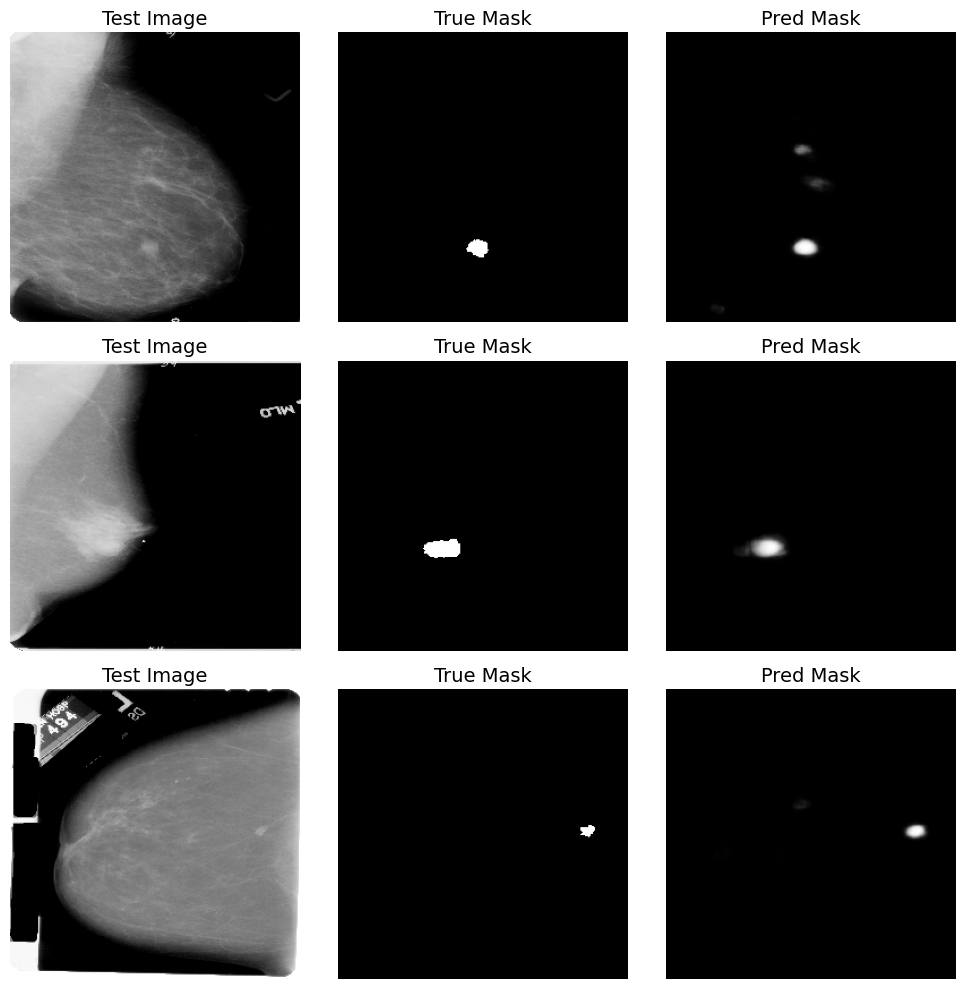

In [80]:
# set up the canvas for the subplots
plt.figure(figsize=(10,10))
plt.axis('Off')

# Our subplot will contain 3 rows and 3 columns
# plt.subplot(nrows, ncols, plot_number)

a = 1
b = 60
c = 30
# == row 1 ==

# image
plt.subplot(3,3,1)
test_image = X_test[a]
plt.imshow(test_image)
plt.title('Test Image', fontsize=14)
plt.axis('off')


# true mask
plt.subplot(3,3,2)
mask = y_test[a]
plt.imshow(mask, cmap='gray')
plt.title('True Mask', fontsize=14)
plt.axis('off')

# predicted mask
plt.subplot(3,3,3)
test_mask = test_preds[a]
plt.imshow(test_mask, cmap='gray')
plt.title('Pred Mask', fontsize=14)
plt.axis('off')


# == row 2 ==

# image
plt.subplot(3,3,4)
test_image = X_test[b]
plt.imshow(test_image)
plt.title('Test Image', fontsize=14)
plt.axis('off')


# true mask
plt.subplot(3,3,5)
mask = y_test[b]
plt.imshow(mask, cmap='gray')
plt.title('True Mask', fontsize=14)
plt.axis('off')

# predicted mask
plt.subplot(3,3,6)
test_mask = test_preds[b]
plt.imshow(test_mask, cmap='gray')
plt.title('Pred Mask', fontsize=14)
plt.axis('off')

# == row 3 ==

# image
plt.subplot(3,3,7)
test_image = X_test[c]
plt.imshow(test_image)
plt.title('Test Image', fontsize=14)
plt.axis('off')


# true mask
plt.subplot(3,3,8)
mask = y_test[c]
plt.imshow(mask, cmap='gray')
plt.title('True Mask', fontsize=14)
plt.axis('off')

# predicted mask
plt.subplot(3,3,9)
test_mask = test_preds[c]
plt.imshow(test_mask, cmap='gray')
plt.title('Pred Mask', fontsize=14)
plt.axis('off')


plt.tight_layout()
plt.show()

In [81]:
from tensorflow.keras.metrics import MeanIoU

n_classes = 2
IOU_keras = MeanIoU(num_classes=n_classes)  
IOU_keras.update_state(preds_test_thresh, y_test)
print("Mean IoU =", IOU_keras.result().numpy())


Mean IoU = 0.59977937


In [82]:
train_preds = model.predict(X_train)
preds_train_thresh = (train_preds >= 0.5).astype(np.uint8)

42/42 [==============================] - 46s 1s/step


In [83]:
n_classes = 2
IOU_keras = MeanIoU(num_classes=n_classes)  
IOU_keras.update_state(preds_train_thresh, y_train)
print("Mean IoU =", IOU_keras.result().numpy())


Mean IoU = 0.7802839


C:\Users\victo\AppData\Local\Temp\ipykernel_3784\2836534500.py:14: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(3,3,1)


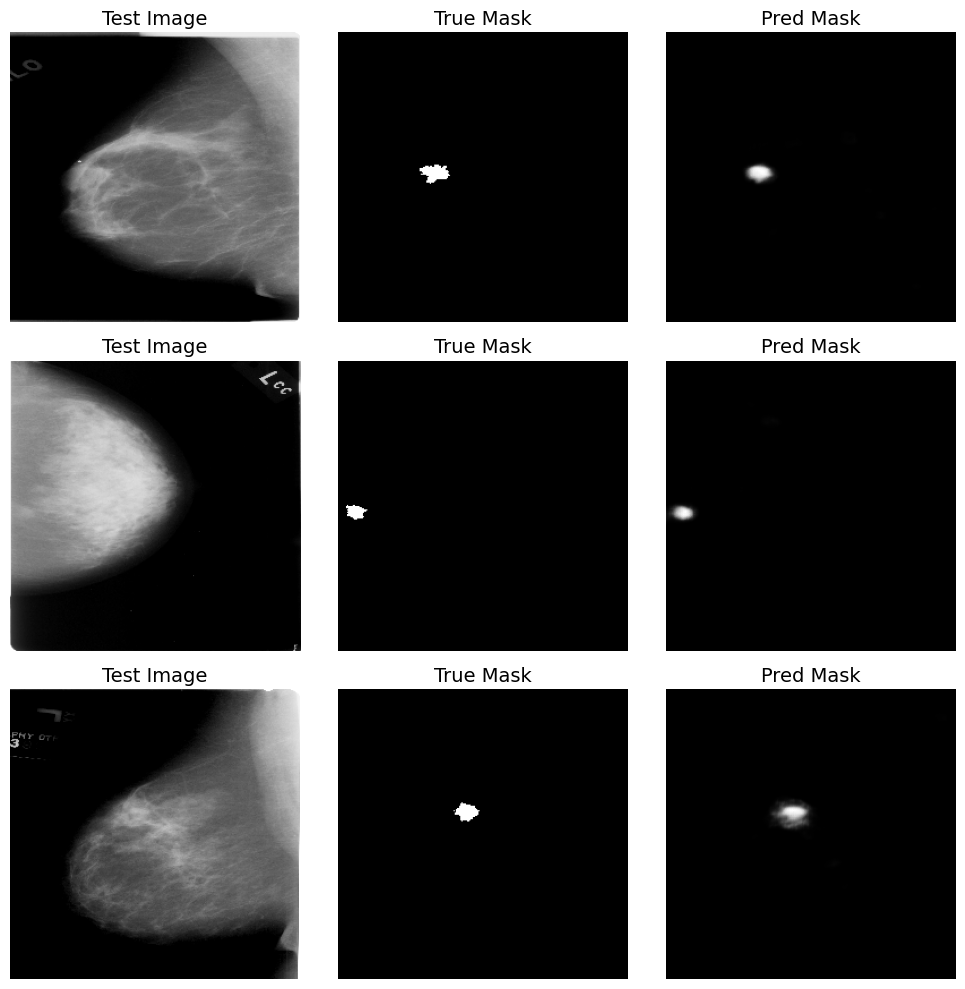

In [84]:
# set up the canvas for the subplots
plt.figure(figsize=(10,10))
plt.axis('Off')

# Our subplot will contain 3 rows and 3 columns
# plt.subplot(nrows, ncols, plot_number)

a = 10
b = 5
c = 300
# == row 1 ==

# image
plt.subplot(3,3,1)
test_image = X_train[a]
plt.imshow(test_image)
plt.title('Test Image', fontsize=14)
plt.axis('off')


# true mask
plt.subplot(3,3,2)
mask = y_train[a]
plt.imshow(mask, cmap='gray')
plt.title('True Mask', fontsize=14)
plt.axis('off')

# predicted mask
plt.subplot(3,3,3)
test_mask = train_preds[a]
plt.imshow(test_mask, cmap='gray')
plt.title('Pred Mask', fontsize=14)
plt.axis('off')


# == row 2 ==

# image
plt.subplot(3,3,4)
test_image = X_train[b]
plt.imshow(test_image)
plt.title('Test Image', fontsize=14)
plt.axis('off')


# true mask
plt.subplot(3,3,5)
mask = y_train[b]
plt.imshow(mask, cmap='gray')
plt.title('True Mask', fontsize=14)
plt.axis('off')

# predicted mask
plt.subplot(3,3,6)
test_mask = train_preds[b]
plt.imshow(test_mask, cmap='gray')
plt.title('Pred Mask', fontsize=14)
plt.axis('off')

# == row 3 ==

# image
plt.subplot(3,3,7)
test_image = X_train[c]
plt.imshow(test_image)
plt.title('Test Image', fontsize=14)
plt.axis('off')


# true mask
plt.subplot(3,3,8)
mask = y_train[c]
plt.imshow(mask, cmap='gray')
plt.title('True Mask', fontsize=14)
plt.axis('off')

# predicted mask
plt.subplot(3,3,9)
test_mask = train_preds[c]
plt.imshow(test_mask, cmap='gray')
plt.title('Pred Mask', fontsize=14)
plt.axis('off')


plt.tight_layout()
plt.show()

In [89]:
from tensorflow.keras.utils import plot_model
plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=True)


You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In [88]:
pip install graphviz

     ---------------------------------------- 47.0/47.0 kB 2.3 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


# Plot Loss & Accuracy

In [92]:
def plot_metrics(history):
    
    train_loss = history['loss']
    val_loss = history['val_loss']
    train_acc = history['acc']
    val_acc = history['val_acc']
    
    # Loss
    plt.figure()
    plt.plot(train_loss, label='Training Loss')
    plt.plot(val_loss, label='Validation Loss')
    plt.title('Loss')
    plt.legend()
    plt.show()
    
    # Accuracy
    plt.figure()
    plt.plot(train_acc, label='Training Accuracy')
    plt.plot(val_acc, label='Validation Accuracy')
    plt.title('Accuracy')
    plt.legend()
    plt.show()

In [98]:
model = load_model('saved_models/brestcancer_unet_60epochs_v2.hdf')
history = model.history.history
for key in history.keys():
    print(key)

AttributeError: 'NoneType' object has no attribute 'history'

In [ ]:
plot_metrics(history) 

In [100]:
# Load the saved Keras model
loaded_model = load_model('saved_models/brestcancer_unet_60epochs_v2.hdf')

# Access the training history of the loaded model
training_history = loaded_model.history

# Now, you can access various training metrics and loss values
loss_values = training_history.history['loss']
accuracy_values = training_history.history['accuracy']

# You can also access validation metrics if you used validation_data during training
val_loss_values = training_history.history['val_loss']
val_accuracy_values = training_history.history['val_accuracy']


AttributeError: 'NoneType' object has no attribute 'history'

In [101]:
loaded_model